In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# load data
boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['y'])

data = pd.concat([X, y], axis=1)

<선형회귀 python 과제>

1. boston 데이터에 column 중 하나인 LSTAT와 y의 선형회귀 수행
2. 위 회귀분석의 r2 score와 mean_squared_error 출력
3. 회귀선과 LSTAT와 y의 산점도를 한 그래프에 시각화
4. LSTAT와의 피어슨 상관계수 절대값이 가장 낮은 column 찾기
5. 4번에서 찾은 column + LSTAT와 y의 다중회귀 수행
6. 위 회귀분석의 r2 score와 mean_squared_error 출력하고, 2번의 결과와 비교

In [3]:
#1번문제
from sklearn.preprocessing import StandardScaler
x_train = data[['LSTAT']] 
y_train = data[['y']]
standard = StandardScaler()
x_train1 = standard.fit_transform(x_train)
clf = LinearRegression()
clf.fit(x_train1,y_train)
y_pred = clf.predict(x_train1)
coef = clf.coef_
intercept = clf.intercept_
print(coef, intercept)

[[-6.77765364]] [22.53280632]


In [4]:
#2번문제
print('r2_score',r2_score(y_train,y_pred))
print('mean_squared_error',mean_squared_error(y_train,y_pred))

r2_score 0.5441462975864797
mean_squared_error 38.48296722989415


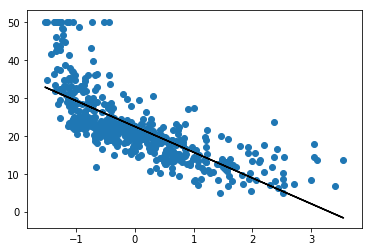

In [5]:
#3번문제
plt.plot(x_train1,x_train1*coef+intercept,color = 'black')
plt.scatter(x_train1,y_train)
plt.show()

In [6]:
#4번문제
corr = abs(data.corr(method = 'pearson'))
print(corr) 
#절댓값 가장 낮은 column = chas

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000  0.199458  0.404471  0.055295  0.417521  0.219940  0.350784   
ZN       0.199458  1.000000  0.533828  0.042697  0.516604  0.311991  0.569537   
INDUS    0.404471  0.533828  1.000000  0.062938  0.763651  0.391676  0.644779   
CHAS     0.055295  0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521  0.516604  0.763651  0.091203  1.000000  0.302188  0.731470   
RM       0.219940  0.311991  0.391676  0.091251  0.302188  1.000000  0.240265   
AGE      0.350784  0.569537  0.644779  0.086518  0.731470  0.240265  1.000000   
DIS      0.377904  0.664408  0.708027  0.099176  0.769230  0.205246  0.747881   
RAD      0.622029  0.311948  0.595129  0.007368  0.611441  0.209847  0.456022   
TAX      0.579564  0.314563  0.720760  0.035587  0.668023  0.292048  0.506456   
PTRATIO  0.288250  0.391679  0.383248  0.121515  0.188933  0.355501  0.261515   
B        0.377365  0.175520 

In [7]:
#5번문제
x_train_abmin = data[['LSTAT','CHAS']]
x_train_abmin1 = standard.fit_transform(x_train_abmin)
clf.fit(x_train_abmin1,y_train)
y_pred = clf.predict(x_train_abmin1)
coef = clf.coef_
intercept = clf.intercept_
print(coef, intercept)

[[-6.71032781  1.24840926]] [22.53280632]


In [8]:
#6번문제
print('r2_score',r2_score(y_train,y_pred))
print('mean_squared_error',mean_squared_error(y_train,y_pred))
#2번 비교: r2_score 증가, mean_squared_error 감소

r2_score 0.5625542706341022
mean_squared_error 36.92897431547921
